In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

data.shape, labels.shape, labels

(torch.Size([150, 4]),
 torch.Size([150]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2]))

In [4]:
def create_model():
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3)
    )
    loss_fun = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=.01)

    return ANNiris, loss_fun, optimizer

In [8]:
epochs = 200

def train_model(trainProp):
    losses = torch.zeros(epochs)
    train_acc = []
    test_acc = []

    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=trainProp)

    for i in range(epochs):
        
        y_hat = ANNiris(X_train)
        loss = loss_fun(y_hat, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_acc.append(100*torch.mean((torch.argmax(y_hat, axis=1) == y_train).float()).item())

        pred_labels = torch.argmax(ANNiris(X_test), axis=1)
        test_acc.append(100*torch.mean((pred_labels == y_test).float()).item())

    return train_acc, test_acc


In [18]:
ANNiris, loss_fun, optimizer = create_model()

In [19]:
train_acc, test_acc = train_model(.8)

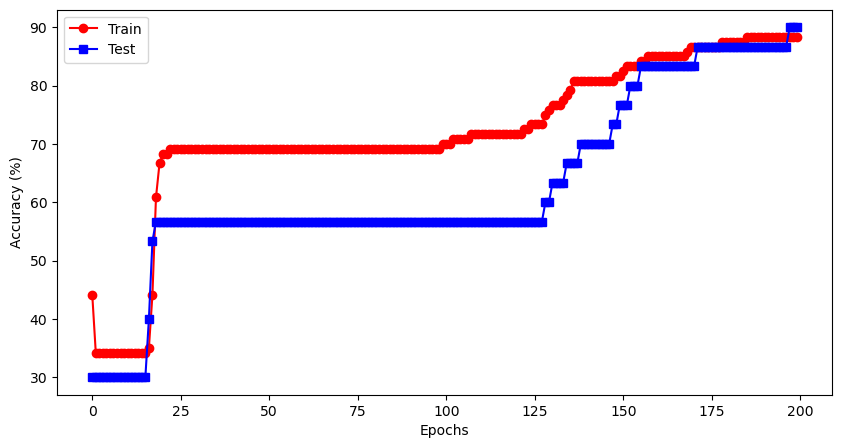

In [20]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(train_acc,'ro-')
plt.plot(test_acc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.show()

In [21]:
train_set_sizes = np.linspace(.2, .95, 10)

all_train_acc = np.zeros((len(train_set_sizes), epochs))
all_test_acc = np.zeros((len(train_set_sizes), epochs))

for i in range(len(train_set_sizes)):
    ANNiris, loss_fun, optimizer = create_model()
    train_acc, test_acc = train_model(train_set_sizes[i])

    all_train_acc[i,:] = train_acc
    all_test_acc[i,:] = test_acc

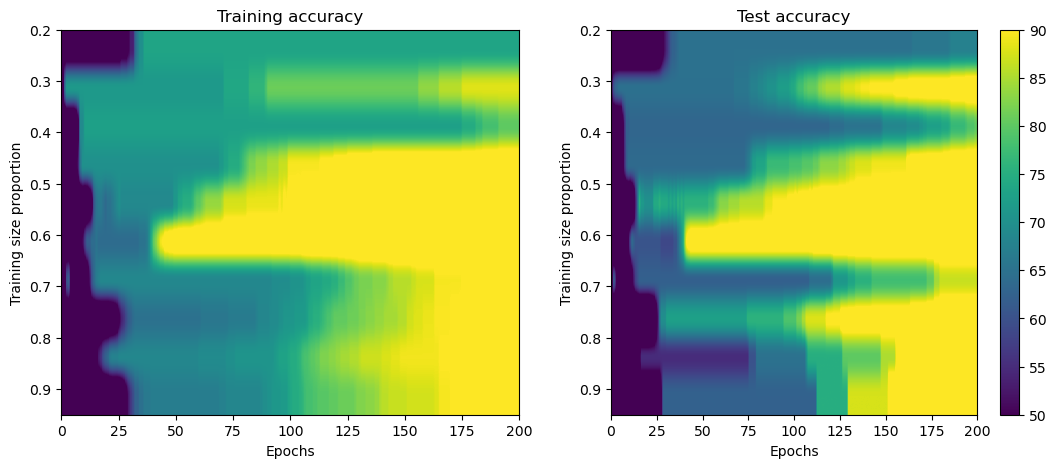

In [22]:
fig,ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(all_train_acc,aspect='auto',
             vmin=50,vmax=90, extent=[0,epochs,train_set_sizes[-1],train_set_sizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(all_test_acc,aspect='auto',
             vmin=50,vmax=90, extent=[0,epochs,train_set_sizes[-1],train_set_sizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()